In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
cancers = ["BLCA", "CESC", "KIRC", "KIRP", "PAAD", "BRCA", "HNSC", "LGG", "SKCM", "PRAD", "OV", "UCEC", "THCA", "LUAD", "LUSC", "COAD", "STAD", "LIHC", "SARC", "ESCA"]
max_no_tads_svm = []
max_no_tads_logreg = []
max_no_tads_rf = []
control_logreg = []
control_rf = []
control_svm = []
for cancer in cancers:
    temp_logreg = pd.read_csv("modeling_prognosis/"+cancer+"/no_tads/logreg_auc_kfold.txt", sep=" ", header=None)
    temp_svm = pd.read_csv("modeling_prognosis/"+cancer+"/no_tads/svm_auc_kfold.txt", sep=" ", header=None)
    temp_rf = pd.read_csv("modeling_prognosis/"+cancer+"/no_tads/rf.txt", sep=" ", header=None)
    max_logreg = 0
    max_svm = 0
    max_rf = 0
    max_control_logreg = 0
    max_control_svm = 0
    max_control_rf = 0
    for i, row in temp_logreg.iterrows():
        if (row[2] == "All" or row[3] == "All"):
            max_logreg = max(max_logreg, row[0])
        if (row[2] == "control" or row[3] == "control"):
            max_control_logreg = max(max_control_logreg, row[0])
    for i, row in temp_svm.iterrows():
        if (row[2] == "All" or row[3] == "All"):
            max_svm = max(max_svm, row[0])
        if (row[2] == "control" or row[3] == "control"):
            max_control_svm = max(max_control_svm, row[0])
    for i, row in temp_rf.iterrows():
        if (row[2] == "All" or row[3] == "All"):
            max_rf = max(max_rf, row[0])
        if (row[2] == "control" or row[3] == "control"):
            max_control_rf = max(max_control_rf, row[0])
    max_no_tads_logreg.append(max_logreg)
    max_no_tads_svm.append(max_svm)
    max_no_tads_rf.append(max_rf)
    control_logreg.append(max_control_logreg)
    control_svm.append(max_control_svm)
    control_rf.append(max_control_rf)

In [5]:
print(", ".join(cancers))

BLCA, CESC, KIRC, KIRP, PAAD, BRCA, HNSC, LGG, SKCM, PRAD, OV, UCEC, THCA, LUAD, LUSC, COAD, STAD, LIHC, SARC, ESCA


In [4]:
print(max_no_tads_logreg)

[0.54, 0.57, 0.5, 0.55, 0.48, 0.58, 0.49, 0.53, 0.52, 0.53, 0.54, 0.57, 0.57, 0.53, 0.53, 0.58, 0.57, 0.58, 0.53, 0.54]


In [18]:
active_svm = []
inactive_svm = []
boundary_svm = []
active_rf = []
inactive_rf = []
boundary_rf = []
active_logreg = []
inactive_logreg = []
boundary_logreg = []
control_rf = []
for cancer in cancers:
    temp_logreg = pd.read_csv("modeling_prognosis/"+cancer+"/clumped_meqtls/logreg_auc_kfold.txt", sep=" ", header=None)
    temp_svm = pd.read_csv("modeling_prognosis/"+cancer+"/clumped_meqtls/svm_auc_kfold.txt", sep=" ", header=None)
    temp_rf = pd.read_csv("modeling_prognosis/"+cancer+"/clumped_meqtls/rf.txt", sep=" ", header=None)
    max_logreg_active = 0
    max_logreg_inactive = 0
    max_logreg_boundary = 0
    max_svm_active= 0
    max_svm_inactive= 0
    max_svm_boundary = 0
    max_rf_active = 0
    max_rf_inactive = 0
    max_rf_boundary = 0
    max_control_rf = 0
    for i, row in temp_logreg.iterrows():
        if (row[2] == "Active" or row[3] == "Active"):
            max_logreg_active = max(max_logreg_active, row[0])
        if (row[2] == "Inactive" or row[3] == "Inactive"):
            max_logreg_inactive = max(max_logreg_inactive, row[0])
        if (row[2] == "Inter-TAD" or row[3] == "Inter-TAD"):
            max_logreg_boundary = max(max_logreg_boundary, row[0])
        
    for i, row in temp_svm.iterrows():
        if (row[2] == "Active" or row[3] == "Active"):
            max_svm_active = max(max_svm_active, row[0])
        if (row[2] == "Inactive" or row[3] == "Inactive"):
            max_svm_inactive = max(max_svm_inactive, row[0])
        if (row[2] == "Inter-TAD" or row[3] == "Inter-TAD"):
            max_svm_boundary = max(max_svm_boundary, row[0])
        
    for i, row in temp_rf.iterrows():
        if (row[2] == "control" or row[3] == "control"):
            max_control_rf = max(max_control_rf, row[0])
        if (row[2] == "Active" or row[3] == "Active"):
            max_rf_active = max(max_rf_active, row[0])
        if (row[2] == "Inactive" or row[3] == "Inactive"):
            max_rf_inactive = max(max_rf_inactive, row[0])
        if (row[2] == "Inter-TAD" or row[3] == "Inter-TAD"):
            max_rf_boundary = max(max_rf_boundary, row[0])
    active_logreg.append(max_logreg_active)
    inactive_logreg.append(max_logreg_inactive)
    boundary_logreg.append(max_logreg_boundary)
    
    active_svm.append(max_svm_active)
    inactive_svm.append(max_svm_inactive)
    boundary_svm.append(max_svm_boundary)
    
    active_rf.append(max_rf_active)
    inactive_rf.append(max_rf_inactive)
    boundary_rf.append(max_rf_boundary)
    control_rf.append(max_control_rf)

In [8]:
logreg_df = pd.DataFrame()
logreg_df["Control"] = control_logreg
logreg_df["Active"] = active_logreg
logreg_df["Inactive"] = inactive_logreg
logreg_df["Inter-TAD"] = boundary_logreg
# logreg_df["All"] = max_no_tads_logreg
logreg_df["Cancers"] = cancers
logreg_df = logreg_df.set_index("Cancers")
differences = []
for i, row in logreg_df.iterrows():
    differences.append(max(row["Active"]-row["Control"], row["Inactive"]-row["Control"], row["Inter-TAD"]-row["Control"]))
logreg_df["difference"] = differences
logreg_df = logreg_df.sort_values(by=["difference"], ascending=False)
del logreg_df["difference"]
logreg_df
# logreg_np.append(max_no_tads_logreg)
# logreg_np.append(control_logreg)
# logreg_np.append(active_logreg)
# logreg_np.append(inactive_logreg)
# logreg_np.append(boundary_logreg)
# logreg_np = np.array(logreg_np)
# logreg_df = pd.DataFrame(logreg_np)
# logreg_df.columns = cancers
# logreg_df["Category"] = ["All", "Control", "Active", "Inactive", "Inter-TAD"]
# logreg_df = logreg_df.set_index("Category")
# logreg_df

,Control,Active,Inactive,Inter-TAD
Cancers,,,,
PAAD,0.36,0.55,0.49,0.52
CESC,0.45,0.60,0.56,0.54
LIHC,0.49,0.47,0.49,0.62
LUSC,0.43,0.55,0.51,0.50
SARC,0.50,0.61,0.55,0.47
BRCA,0.52,0.51,0.60,0.53
THCA,0.49,0.44,0.52,0.57
PRAD,0.49,0.56,0.46,0.54
STAD,0.52,0.50,0.56,0.52


In [34]:
active_diff = []
inactive_diff = []
boundary_diff = []
count = 0
cancers_logreg = []
for i, row in logreg_df.iterrows():
#     if (row["Active"]>row["Control"] or row["Inactive"]>row["Control"] or row["Inter-TAD"]>row["Control"]):
    if i in cancers_to_consider:
        active_diff.append(row["Active"]-row["Control"])
        inactive_diff.append(row["Inactive"]-row["Control"])
        boundary_diff.append(row["Inter-TAD"]-row["Control"])
    if (row["Active"]>row["Control"] or row["Inactive"]>row["Control"] or row["Inter-TAD"]>row["Control"]):
        cancers_logreg.append(i)
        count+=1
print("Active meQTLs Average Increase in AUC from Control:", np.mean(active_diff)) 
print("Inactive meQTLs Average Increase in AUC from Control:", np.mean(inactive_diff))    
print("Inter-TAD(Boundary) meQTLs Average Increase in AUC from Control:", np.mean(boundary_diff))   
print(cancers_logreg)
print(count)

Active meQTLs Average Increase in AUC from Control: 0.04727272727272727
Inactive meQTLs Average Increase in AUC from Control: 0.03909090909090909
Inter-TAD(Boundary) meQTLs Average Increase in AUC from Control: 0.0490909090909091
['PAAD', 'CESC', 'LIHC', 'LUSC', 'SARC', 'BRCA', 'THCA', 'PRAD', 'STAD', 'LUAD', 'UCEC', 'ESCA', 'HNSC', 'LGG']
14


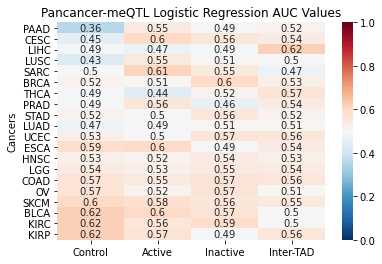

In [10]:
ax1 = plt.axes()
logreg_heatmap = sns.heatmap(logreg_df, annot=True, fmt="g", cmap="RdBu_r", vmin=0, vmax=1)
ax1.set_title("Pancancer-meQTL Logistic Regression AUC Values")
plt.savefig("plots/pancancer_logreg_heatmap.pdf")
plt.show()

In [11]:
svm_df = pd.DataFrame()
svm_df["Control"] = control_svm
svm_df["Active"] = active_svm
svm_df["Inactive"] = inactive_svm
svm_df["Inter-TAD"] = boundary_svm
# svm_df["All"] = max_no_tads_svm
svm_df["Cancers"] = cancers
svm_df = svm_df.set_index("Cancers")
differences = []
for i, row in svm_df.iterrows():
    differences.append(max(row["Active"]-row["Control"], row["Inactive"]-row["Control"], row["Inter-TAD"]-row["Control"]))
svm_df["difference"] = differences
svm_df = svm_df.sort_values(by=["difference"], ascending=False)
del svm_df["difference"]
svm_df

,Control,Active,Inactive,Inter-TAD
Cancers,,,,
STAD,0.35,0.61,0.67,0.53
ESCA,0.53,0.76,0.59,0.51
UCEC,0.45,0.55,0.52,0.54
OV,0.48,0.50,0.58,0.54
THCA,0.55,0.58,0.64,0.53
PRAD,0.50,0.58,0.56,0.55
CESC,0.52,0.57,0.55,0.60
LIHC,0.57,0.64,0.60,0.62
SKCM,0.51,0.53,0.58,0.47


In [33]:
active_diff = []
inactive_diff = []
boundary_diff = []
count = 0
cancers_svm = []
for i, row in svm_df.iterrows():
#     if (row["Active"]>row["Control"] or row["Inactive"]>row["Control"] or row["Inter-TAD"]>row["Control"]):
    if i in cancers_to_consider:
        active_diff.append(row["Active"]-row["Control"])
        inactive_diff.append(row["Inactive"]-row["Control"])
        boundary_diff.append(row["Inter-TAD"]-row["Control"])
    if (row["Active"]>row["Control"] or row["Inactive"]>row["Control"] or row["Inter-TAD"]>row["Control"]):
        cancers_svm.append(i)
        count+=1
print("Active meQTLs Average Increase in AUC from Control:", np.mean(active_diff)) 
print("Inactive meQTLs Average Increase in AUC from Control:", np.mean(inactive_diff))    
print("Inter-TAD(Boundary) meQTLs Average Increase in AUC from Control:", np.mean(boundary_diff))   
print(cancers_svm)
print(count)

Active meQTLs Average Increase in AUC from Control: 0.07909090909090909
Inactive meQTLs Average Increase in AUC from Control: 0.053636363636363656
Inter-TAD(Boundary) meQTLs Average Increase in AUC from Control: 0.04636363636363638
['STAD', 'ESCA', 'UCEC', 'OV', 'THCA', 'PRAD', 'CESC', 'LIHC', 'SKCM', 'SARC', 'BRCA', 'COAD', 'LUSC', 'PAAD', 'KIRC']
15


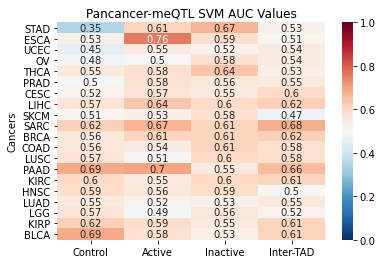

In [14]:
ax2 = plt.axes()
svm_heatmap = sns.heatmap(svm_df, annot=True, fmt="g", cmap="RdBu_r", vmin=0, vmax=1)
ax2.set_title("Pancancer-meQTL SVM AUC Values")
plt.savefig("plots/pancancer_svm_heatmap.pdf")
plt.show()

In [19]:
rf_df = pd.DataFrame()
rf_df["Control"] = control_rf
rf_df["Active"] = active_rf
rf_df["Inactive"] = inactive_rf
rf_df["Inter-TAD"] = boundary_rf
# rf_df["All"] = max_no_tads_rf
rf_df["Cancers"] = cancers
rf_df = rf_df.set_index("Cancers")
differences = []
for i, row in rf_df.iterrows():
    differences.append(max(row["Active"]-row["Control"], row["Inactive"]-row["Control"], row["Inter-TAD"]-row["Control"]))
rf_df["difference"] = differences
rf_df = rf_df.sort_values(by=["difference"], ascending=False)
del rf_df["difference"]
rf_df

,Control,Active,Inactive,Inter-TAD
Cancers,,,,
SARC,0.42,0.67,0.50,0.58
CESC,0.51,0.68,0.63,0.52
STAD,0.36,0.40,0.49,0.50
LIHC,0.51,0.47,0.51,0.64
PAAD,0.46,0.59,0.49,0.47
UCEC,0.49,0.51,0.61,0.60
BLCA,0.54,0.64,0.56,0.56
OV,0.52,0.57,0.60,0.61
LGG,0.51,0.59,0.60,0.55


In [32]:
active_diff = []
inactive_diff = []
boundary_diff = []
count = 0
cancers_rf = []
for i, row in rf_df.iterrows():
#     if (row["Active"]>row["Control"] or row["Inactive"]>row["Control"] or row["Inter-TAD"]>row["Control"]):
    if i in cancers_to_consider:
        active_diff.append(row["Active"]-row["Control"])
        inactive_diff.append(row["Inactive"]-row["Control"])
        boundary_diff.append(row["Inter-TAD"]-row["Control"])
    if (row["Active"]>row["Control"] or row["Inactive"]>row["Control"] or row["Inter-TAD"]>row["Control"]):
        cancers_rf.append(i)
        count+=1
print("Active meQTLs Average Increase in AUC from Control:", np.mean(active_diff)) 
print("Inactive meQTLs Average Increase in AUC from Control:", np.mean(inactive_diff))    
print("Inter-TAD(Boundary) meQTLs Average Increase in AUC from Control:", np.mean(boundary_diff))   
print(cancers_rf)
print(count)

Active meQTLs Average Increase in AUC from Control: 0.05272727272727273
Inactive meQTLs Average Increase in AUC from Control: 0.06454545454545454
Inter-TAD(Boundary) meQTLs Average Increase in AUC from Control: 0.0618181818181818
['SARC', 'CESC', 'STAD', 'LIHC', 'PAAD', 'UCEC', 'BLCA', 'OV', 'LGG', 'ESCA', 'SKCM', 'THCA', 'BRCA', 'HNSC', 'PRAD', 'LUSC', 'LUAD', 'KIRC']
18


In [24]:
int1 = set(cancers_logreg).intersection(cancers_svm)
int1.intersection(cancers_rf)

{'BRCA',
 'CESC',
 'ESCA',
 'LIHC',
 'LUSC',
 'PAAD',
 'PRAD',
 'SARC',
 'STAD',
 'THCA',
 'UCEC'}

In [31]:
cancers_to_consider = list(int1)

In [30]:
", ".join(list(int1))

'BRCA, CESC, LUSC, PAAD, LIHC, UCEC, STAD, THCA, SARC, ESCA, PRAD'

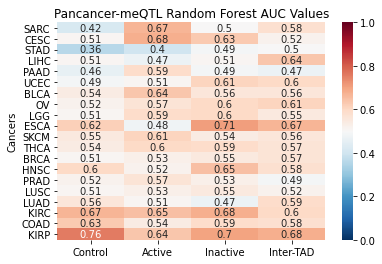

In [23]:
ax3 = plt.axes()
rf_heatmap = sns.heatmap(rf_df, annot=True, fmt="g", cmap="RdBu_r", vmin=0, vmax=1)
ax3.set_title("Pancancer-meQTL Random Forest AUC Values")
plt.savefig("plots/pancancer_rf_heatmap.pdf")
plt.show()